<a href="https://colab.research.google.com/github/pa0lai/MachineLearning/blob/main/EDA_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA:https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/code?datasetId=251&sortBy=voteCount`

第二題
出處：https://www.kaggle.com/code/kanncaa1/does-alcohol-affect-success/notebook

Does alcohol affect success

enviornment settings

In [ ]:
import numpy as np # 數學運算
import pandas as pd # IO, 統計
import seaborn as sns # 視覺化
import matplotlib.pyplot as plt  #繪圖

from google.colab import files
files.upload_file('abc.csv')  # 會自動改名


Saved student-mat.csv to /content/abc.csv


read csv


In [ ]:
data = pd.read_csv('abc.csv')

用array陳現（不算一種）

In [ ]:
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

熱點圖（相關性）

<ipython-input-4-fe98dbfdac39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3')])

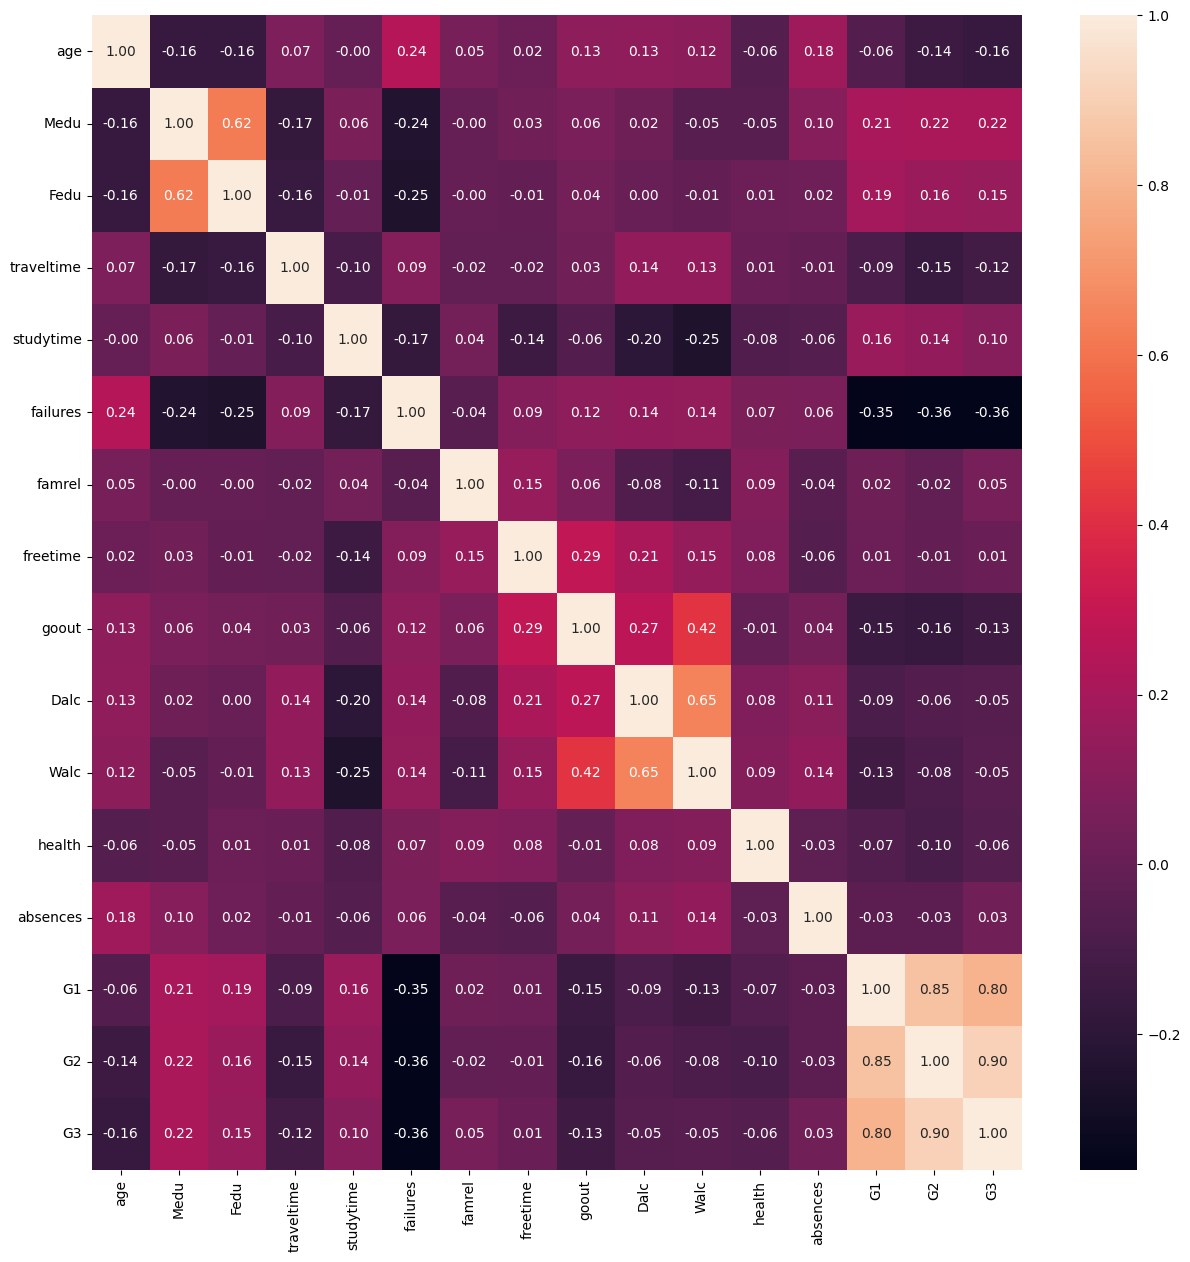

In [ ]:
plt.figure(figsize=(15,15))  #圖的尺寸
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
# data.corr()計算了變數之間的相關性
# sns.heatmap()用來將相關性數據轉換成Heatmap
# annot=True表示在每個熱度圖單元格中標註數值，fmt=".2f"指定了顯示的數值格式為小數點後兩位
# cbar=True表示在熱度圖的右側添加一個顏色欄（顏色條），用來表示相關性的大小。


plt.xticks(rotation=90)  #旋轉x軸上的刻度標籤，使它們以90度角度顯示
plt.yticks(rotation = 0)  #不旋轉

長條圖（學生每週飲酒次數）

Text(0.5, 0, 'Weekly alcohol consumption')

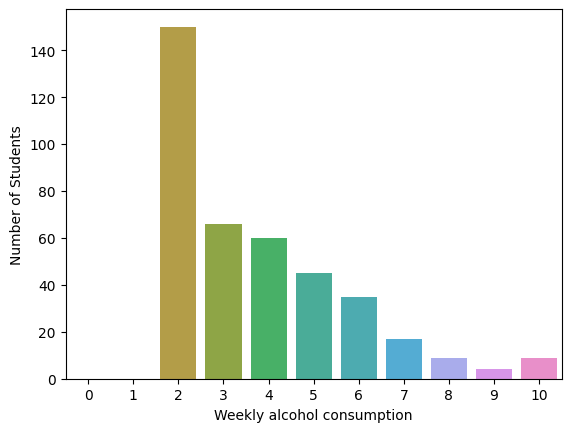

In [ ]:
data['Dalc'] = data['Dalc'] + data['Walc']  #週間週末飲酒次數合併

list = []  #建一個array
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

圓餅圖  學生成績分布（依據飲酒多寡）

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

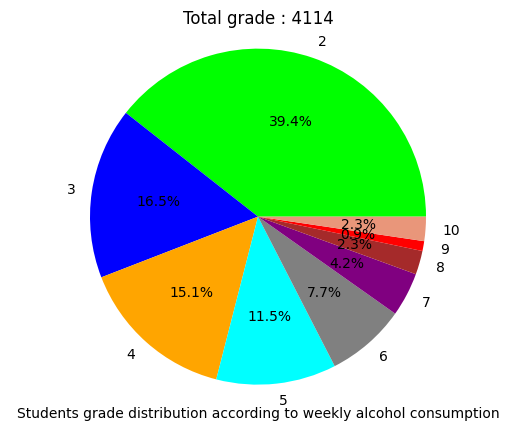

In [ ]:
labels = ['2','3','4','5','6','7','8','9','10'] #分數
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']  #顏色
explode = [0,0,0,0,0,0,0,0,0]  #指定是否要將某個部分拉出的列表。在這個題中所有部分都不會被拉出，因此所有值都是0。
sizes = []  #稍後將用於存儲每個分數對應的成績總和
for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))  #這個迴圈2到10（對應於週酒精消耗水平），計算每個水平的學生的成績總和，將結果添加到sizes中
total_grade = sum(sizes)  #所有學生的成績總和
average = total_grade/float(len(data))  #平均成績
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')  #c繪製圓餅圖
plt.axis('equal')  #使成為正圓
plt.title('Total grade : '+str(total_grade))  #顯示total grade
plt.xlabel('Students grade distribution according to weekly alcohol consumption')  #標題

第三題

最有趣的EDA方法：可互動的3D散佈圖

原因：
1. 三變數數據的可視化
2. 通過旋轉、平移和縮放進行數據的探索。這種視角的操作幫助用戶更深
3. 互動式圖表可以提高理解度，更容易地數據的探索和分析。能有助於更有效的結果傳達。

想法：我覺得3D點陣圖也有一些值得注意的限制。首先，當數據點非常密集或者有重疊時，圖表可能會變得混亂，會難以區分各個點。且3D散點圖僅限於展示三個變數，如果有多於三個變數需要考慮，那就需要使用其他方式進行可視化了。3D圖表的立體視角雖然提供了更多信息，但也有可能讓圖表變得複雜。

儘管有這些限制，3D散點圖仍是一個有用的工具，特別是需要深入探索三變數數據的時後。